Rudraksh Singh E22CSEU0010 Computer Vision Lab 10

In [2]:
!pip install PyWavelets
!pip install scikit-image
!pip install csbdeep

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 3.0 MB/s eta 0:00:00


In [3]:
!pip install n2v csbdeep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.3/210.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 739.1/739.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.

In [18]:
import cv2
import numpy as np
import os
from skimage import io, restoration, metrics, filters
from skimage.restoration import denoise_wavelet
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.transform import resize
import tensorflow as tf


from n2v.models import N2V
from n2v.utils.n2v_utils import manipulate_val_data
from csbdeep.utils import normalize

--- Median Filter Metrics ---
PSNR: 28.38953274053862
SSIM: 0.7115401124939185
MSE: 94.21652603149414
--- Wavelet Denoising Metrics ---
PSNR: 27.637743644003013
SSIM: 0.7009431741809279
MSE: 112.02268981933594


(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

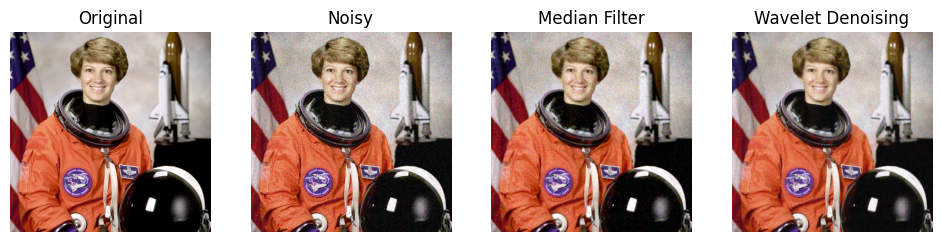

In [19]:

from skimage.data import astronaut
image = astronaut() / 255.0
noisy_image = random_noise(image, mode='gaussian')

# Median Filter
denoised_median = cv2.medianBlur((noisy_image*255).astype(np.uint8), 3)

# Wavelet Denoising
denoised_wavelet = denoise_wavelet(noisy_image, channel_axis=-1)

# Metrics
original_gray = cv2.cvtColor((image*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
median_gray = cv2.cvtColor(denoised_median, cv2.COLOR_RGB2GRAY)
wavelet_gray = cv2.cvtColor((denoised_wavelet*255).astype(np.uint8), cv2.COLOR_RGB2GRAY)

print("--- Median Filter Metrics ---")
print("PSNR:", psnr(original_gray, median_gray))
print("SSIM:", ssim(original_gray, median_gray))
print("MSE:", mse(original_gray, median_gray))

print("--- Wavelet Denoising Metrics ---")
print("PSNR:", psnr(original_gray, wavelet_gray))
print("SSIM:", ssim(original_gray, wavelet_gray))
print("MSE:", mse(original_gray, wavelet_gray))


# Visualize Denoising Results
plt.figure(figsize=(15, 6))
plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(noisy_image)
plt.title("Noisy")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(denoised_median)
plt.title("Median Filter")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(denoised_wavelet)
plt.title("Wavelet Denoising")
plt.axis("off")

In [ ]:
# ------------------- EXTRACT FRAMES FROM VIDEO -------------------
video_path = '/content/Snapchat-1434332957.mp4'
output_folder = '/content/frames'
os.makedirs(output_folder, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_id = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imwrite(f"{output_folder}/frame_{frame_id:04d}.jpg", frame)
    frame_id += 1
cap.release()
print(f"Extracted {frame_id} frames.")

Extracted 238 frames.


In [ ]:
# ------------------- PROCESS VIDEO FRAME BY FRAME -------------------
output_dir = "/content/processed_frames"
os.makedirs(output_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_list = []
frame_id = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY, 11, 2)
    edges = cv2.Canny(blur, 100, 200)
    inverted = cv2.bitwise_not(edges)

    filename = os.path.join(output_dir, f"processed_{frame_id:04d}.jpg")
    cv2.imwrite(filename, inverted)
    frame_list.append(inverted)
    frame_id += 1
cap.release()
print(f"Processed {frame_id} frames.")

Processed 238 frames.


Processed video saved.


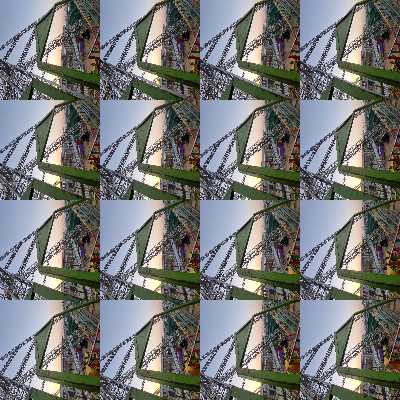

In [ ]:
# ------------------- RECREATE VIDEO -------------------
height, width = frame_list[0].shape
out = cv2.VideoWriter('/content/processed_video.avi',
                      cv2.VideoWriter_fourcc(*'XVID'), 20, (width, height), isColor=False)
for frame in frame_list:
    out.write(cv2.cvtColor(frame, cv2.COLOR_GRAY2BGR))
out.release()
print("Processed video saved.")

# ------------------- COLLAGE -------------------
collage_path = "/content/collage.jpg"
image_folder = output_folder
files = sorted([f for f in os.listdir(image_folder) if f.endswith(".jpg")])[:16]
images = [cv2.resize(cv2.imread(os.path.join(image_folder, f)), (100, 100)) for f in files]
collage = np.vstack([
    np.hstack(images[i:i+4]) for i in range(0, 16, 4)
])
cv2.imwrite(collage_path, collage)
cv2_imshow(collage)

In [ ]:
!pip install tensorflow opencv-python
!pip install kaggle

In [20]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [21]:
import kagglehub
path = kagglehub.dataset_download("pevogam/ucf101")
print(path)

/kaggle/input/ucf101


In [38]:
import os
import shutil
import random
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
dataset_path = '/kaggle/input/ucf101/UCF101'
for root, dirs, files in os.walk(dataset_path):
    print("📁", root)
    for d in dirs:
        print(" ┣━", d)
    for f in files[:5]:
        print(" ┗━", f)
    break

📁 /kaggle/input/ucf101/UCF101
 ┣━ UCF-101


In [39]:
import kagglehub
path = kagglehub.dataset_download("pevogam/ucf101")
print("Path to dataset files:", path)

SOURCE_DIR = os.path.join(path, 'UCF101', 'UCF-101')
DEST_DIR = './UCF101_subset'
SELECTED_CLASSES = ['Basketball', 'Biking', 'PlayingGuitar', 'Typing', 'JumpRope']
VIDEOS_PER_CLASS = 10

os.makedirs(DEST_DIR, exist_ok=True)

for cls in SELECTED_CLASSES:
    class_path = os.path.join(SOURCE_DIR, cls)
    dest_class_path = os.path.join(DEST_DIR, cls)
    os.makedirs(dest_class_path, exist_ok=True)

    selected = random.sample(os.listdir(class_path), VIDEOS_PER_CLASS)
    for video in selected:
        shutil.copy(os.path.join(class_path, video), dest_class_path)

Path to dataset files: /kaggle/input/ucf101


In [40]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import img_to_array, load_img

VIDEO_DIR = './UCF101_subset'
FRAME_DIR = './frames'
os.makedirs(FRAME_DIR, exist_ok=True)

#Preprocess
def extract_frames(video_path, frame_size=(224, 224), num_frames=16, frame_gap=5):
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    frames = []

    for i in range(0, total_frames, frame_gap):
        ret, frame = cap.read()
        if not ret:
            break
        if len(frames) >= num_frames:
            break
        frame = cv2.resize(frame, frame_size)
        frames.append(frame)

    cap.release()
    frames = frames[:num_frames]
    return np.array(frames)

In [41]:
def preprocess_dataset():
    video_paths = []
    labels = []
    frame_sequences = []

    for label, cls in enumerate(os.listdir(DEST_DIR)):
        class_folder = os.path.join(DEST_DIR, cls)
        for video_file in os.listdir(class_folder):
            video_path = os.path.join(class_folder, video_file)
            frames = extract_frames(video_path)
            if len(frames) == 16:
                frame_sequences.append(frames)
                video_paths.append(video_path)
                labels.append(cls)

    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    X_train, X_test, y_train, y_test = train_test_split(frame_sequences, labels_encoded, test_size=0.2, random_state=42)

    return np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test), label_encoder.classes_

X_train, X_test, y_train, y_test, class_names = preprocess_dataset()
print(f"Training data shape: {X_train.shape}, Test data shape: {X_test.shape}")

Training data shape: (109, 16, 224, 224, 3), Test data shape: (28, 16, 224, 224, 3)


In [45]:
# CNN + LSTM Model
def build_cnn_lstm_model(input_shape=(16, 224, 224, 3), num_classes=5):
    cnn_base = ResNet50(include_top=False, input_shape=(224, 224, 3))
    cnn_base.trainable = False  # Freeze layers

    inputs = layers.Input(shape=input_shape)
    cnn_features = []
    for i in range(input_shape[0]):
        frame_input = layers.Lambda(lambda x: x[:, i])(inputs)
        frame_features = cnn_base(frame_input)
        cnn_features.append(frame_features)
    cnn_features = layers.Concatenate()(cnn_features)
    cnn_features = layers.GlobalAveragePooling2D()(cnn_features)

    lstm_input = layers.Reshape((-1, cnn_features.shape[-1]))(cnn_features)
    lstm_out = layers.LSTM(128)(lstm_input)
    outputs = layers.Dense(num_classes, activation='softmax')(lstm_out)

    model = models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# 3D CNN Model
def build_3d_cnn_model(input_shape=(16, 224, 224, 3), num_classes=5):
    model = models.Sequential()
    model.add(layers.Conv3D(64, (3, 3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling3D((1, 2, 2)))
    model.add(layers.Conv3D(128, (3, 3, 3), activation='relu'))
    model.add(layers.MaxPooling3D((1, 2, 2)))
    model.add(layers.Conv3D(256, (3, 3, 3), activation='relu'))
    model.add(layers.GlobalAveragePooling3D())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [49]:
cnn_lstm_model = build_cnn_lstm_model(input_shape=(16, 224, 224, 3), num_classes=5)
cnn_lstm_model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 16, 224,   │          0 │ -                 │
│ (InputLayer)        │ 224, 3)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_32 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_33 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_34 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_35 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_36 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_37 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_38 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_39 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_40 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_41 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_42 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_43 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_44 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_45 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_46 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]… │
│                     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_47 (Lambda)  │ (None, 224, 224,  │          0 │ input_layer_8[0]

 Total params: 40,431,621 (154.23 MB)

 Trainable params: 16,843,909 (64.25 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [50]:
three_d_cnn_model = build_3d_cnn_model(input_shape=(16, 224, 224, 3), num_classes=5)
three_d_cnn_model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d_9 (Conv3D)               │ (None, 14, 222, 222,   │         5,248 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_6 (MaxPooling3D)  │ (None, 14, 111, 111,   │             0 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_10 (Conv3D)              │ (None, 12, 109, 109,   │       221,312 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_7 (MaxPooling3D)  │ (None, 12, 54, 54,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_11 (Conv3D)              │ (None, 10, 52, 52,     │       884,992 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d_3      │ (None, 256)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,145,093 (4.37 MB)

 Trainable params: 1,145,093 (4.37 MB)

 Non-trainable params: 0 (0.00 B)

In [43]:
print("Training CNN + LSTM Model")
cnn_lstm_model = build_cnn_lstm_model(input_shape=(16, 224, 224, 3), num_classes=len(class_names))
cnn_lstm_history = cnn_lstm_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=4)

Training CNN + LSTM Model
Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.4196 - loss: 1.7311 - val_accuracy: 0.5714 - val_loss: 0.9428
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 43s 407ms/step - accuracy: 0.6120 - loss: 0.9398 - val_accuracy: 0.8214 - val_loss: 0.7978
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 20s 409ms/step - accuracy: 0.8362 - loss: 0.7960 - val_accuracy: 0.8571 - val_loss: 0.7258
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 411ms/step - accuracy: 0.9668 - loss: 0.6568 - val_accuracy: 0.9286 - val_loss: 0.6487
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 413ms/step - accuracy: 0.9668 - loss: 0.4913 - val_accuracy: 0.8929 - val_loss: 0.5740
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 427ms/step - accuracy: 0.9614 - loss: 0.4957 - val_accuracy: 0.9643 - val_loss: 0.4618
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.9669 - loss: 0.4089 - val_accuracy: 0.9643 - val_loss: 0.5008
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 416ms/step - accuracy: 0.9210 -

In [46]:
print("Training 3D CNN Model")
three_d_cnn_model = build_3d_cnn_model(input_shape=(16, 224, 224, 3), num_classes=len(class_names))
three_d_cnn_history = three_d_cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=4)

Training 3D CNN Model
Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.1200 - loss: 35.4370 - val_accuracy: 0.1786 - val_loss: 1.6463
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 50s 500ms/step - accuracy: 0.2298 - loss: 1.5964 - val_accuracy: 0.2500 - val_loss: 1.5824
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 505ms/step - accuracy: 0.2069 - loss: 1.6785 - val_accuracy: 0.1786 - val_loss: 1.6022
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 505ms/step - accuracy: 0.2518 - loss: 1.5858 - val_accuracy: 0.2857 - val_loss: 1.5613
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 510ms/step - accuracy: 0.3773 - loss: 1.5884 - val_accuracy: 0.2500 - val_loss: 1.5515
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 14s 518ms/step - accuracy: 0.3143 - loss: 1.4954 - val_accuracy: 0.2857 - val_loss: 1.4827
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 21s 519ms/step - accuracy: 0.3275 - loss: 1.5662 - val_accuracy: 0.3214 - val_loss: 1.5106
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 22s 570ms/step - accuracy: 0.4465 - los

1/1 ━━━━━━━━━━━━━━━━━━━━ 34s 34s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 36s 36s/step
CNN+LSTM Model Evaluation:


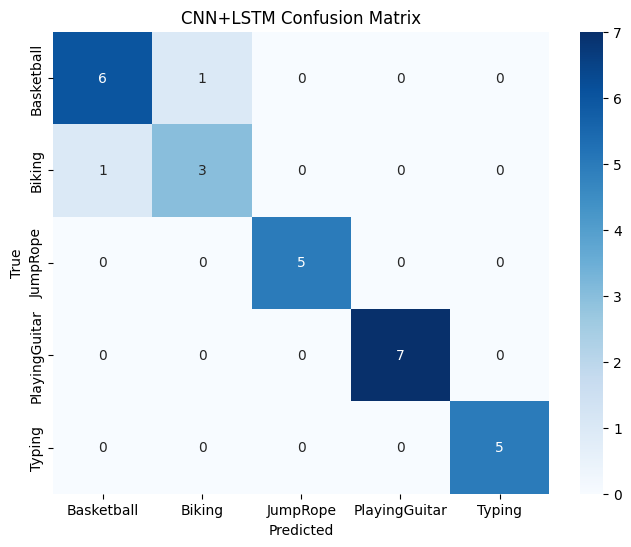

               precision    recall  f1-score   support

   Basketball       0.86      0.86      0.86         7
       Biking       0.75      0.75      0.75         4
     JumpRope       1.00      1.00      1.00         5
PlayingGuitar       1.00      1.00      1.00         7
       Typing       1.00      1.00      1.00         5

     accuracy                           0.93        28
    macro avg       0.92      0.92      0.92        28
 weighted avg       0.93      0.93      0.93        28



In [47]:
# CNN+LSTM Evaluation
y_pred_cnn_lstm = cnn_lstm_model.predict(X_test)
y_pred_classes_cnn_lstm = np.argmax(y_pred_cnn_lstm, axis=1)

# 3D CNN Evaluation
y_pred_3d_cnn = three_d_cnn_model.predict(X_test)
y_pred_classes_3d_cnn = np.argmax(y_pred_3d_cnn, axis=1)

# Confusion Matrix & Classification Report
print("CNN+LSTM Model Evaluation:")
cm_cnn_lstm = confusion_matrix(y_test, y_pred_classes_cnn_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cnn_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('CNN+LSTM Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes_cnn_lstm, target_names=class_names))

3D CNN Model Evaluation:


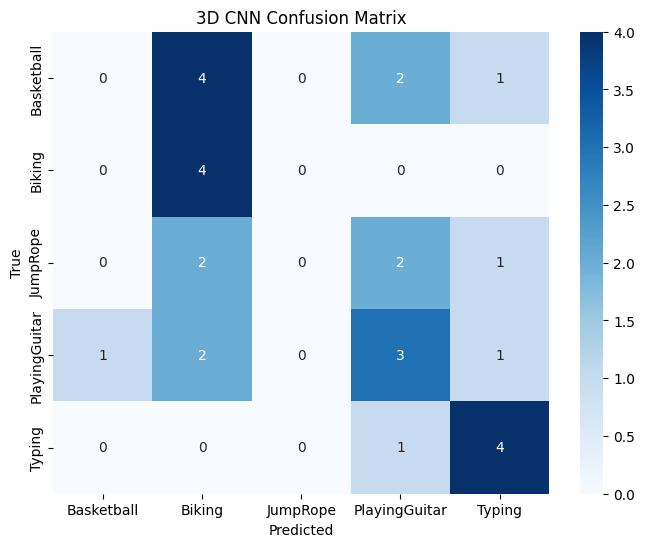

               precision    recall  f1-score   support

   Basketball       0.00      0.00      0.00         7
       Biking       0.33      1.00      0.50         4
     JumpRope       0.00      0.00      0.00         5
PlayingGuitar       0.38      0.43      0.40         7
       Typing       0.57      0.80      0.67         5

     accuracy                           0.39        28
    macro avg       0.26      0.45      0.31        28
 weighted avg       0.24      0.39      0.29        28



In [48]:
print("3D CNN Model Evaluation:")
cm_3d_cnn = confusion_matrix(y_test, y_pred_classes_3d_cnn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_3d_cnn, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('3D CNN Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred_classes_3d_cnn, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

--- Image 1 ---
Median: PSNR=26.96, SSIM=0.8328, MSE=130.92
Wavelet: PSNR=23.18, SSIM=0.6700, MSE=312.43
N2V: PSNR=14.78, SSIM=0.6760, MSE=2162.41


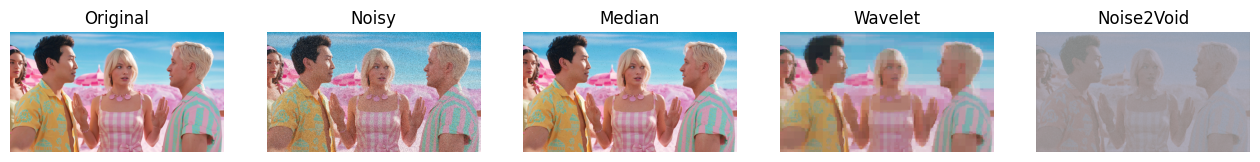

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Image 2 ---
Median: PSNR=26.05, SSIM=0.8627, MSE=161.65
Wavelet: PSNR=16.23, SSIM=0.1632, MSE=1550.43
N2V: PSNR=12.54, SSIM=0.5693, MSE=3621.43


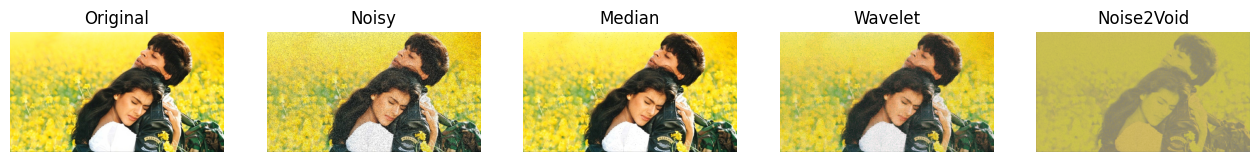

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

--- Image 3 ---
Median: PSNR=26.52, SSIM=0.8232, MSE=144.90
Wavelet: PSNR=18.46, SSIM=0.2008, MSE=925.94
N2V: PSNR=13.15, SSIM=0.3827, MSE=3145.36


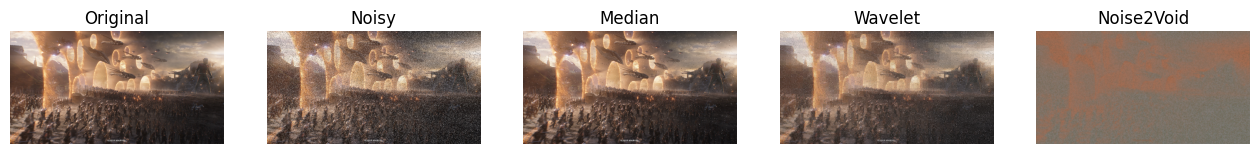

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import median
from skimage.restoration import denoise_wavelet
from skimage.morphology import disk
from skimage.metrics import peak_signal_noise_ratio, structural_similarity, mean_squared_error
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

def add_salt_pepper_noise(img, amount=0.05):
    noisy = img.copy()
    num_salt = np.ceil(amount * img.size * 0.5)
    num_pepper = np.ceil(amount * img.size * 0.5)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in img.shape[:2]]
    noisy[coords[0], coords[1], :] = 255
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in img.shape[:2]]
    noisy[coords[0], coords[1], :] = 0
    return noisy.astype(np.uint8)

def masked_mse_loss(y_true, y_pred):
    mask = tf.cast(tf.not_equal(y_true, 0.0), tf.float32)
    return tf.reduce_mean(tf.square(y_true - y_pred) * mask)

def build_n2v_model(input_shape):
    inp = Input(shape=input_shape)
    x = inp
    for _ in range(3):
        x = Conv2D(32, 3, padding='same', activation='relu')(x)
    out = Conv2D(3, 1, padding='same', activation='sigmoid')(x)
    return Model(inp, out)

image_paths = ['/content/barbie-2023-movie-review.jpg',
               '/content/71WpHmp3C3L.jpg',
               '/content/Weta_sGEN_base_PublicityStillsEBC1880Standard_comp2k_v01.1001_Copyright.jpg']

for idx, path in enumerate(image_paths):
    img = cv2.imread(path)
    if img is None:
        continue
    original = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    noisy = add_salt_pepper_noise(original, amount=0.05)

    # Median
    denoised_median = np.stack([median(noisy[..., c], disk(1)) for c in range(3)], axis=-1)

    # Wavelet
    denoised_wavelet = np.stack([
        (denoise_wavelet(noisy[..., c], channel_axis=None, method='VisuShrink', mode='soft', rescale_sigma=True) * 255).astype(np.uint8)
        for c in range(3)], axis=-1)

    # N2V
    model = build_n2v_model(noisy.shape)
    model.compile(optimizer='adam', loss=masked_mse_loss)

    x_train = noisy.astype(np.float32) / 255.0
    y_train = original.astype(np.float32) / 255.0
    x_train = np.expand_dims(x_train, 0)
    y_train = np.expand_dims(y_train, 0)

    model.fit(x_train, y_train, epochs=10, verbose=0)
    pred = model.predict(x_train)[0]
    denoised_n2v = (pred * 255).astype(np.uint8)

    # Metrics
    def get_metrics(ref, den):
        return {
            'PSNR': peak_signal_noise_ratio(ref, den),
            'SSIM': structural_similarity(ref, den, channel_axis=-1),
            'MSE': mean_squared_error(ref, den)
        }

    m_med = get_metrics(original, denoised_median)
    m_wav = get_metrics(original, denoised_wavelet)
    m_n2v = get_metrics(original, denoised_n2v)

    print(f"\n--- Image {idx+1} ---")
    for name, m in zip(['Median', 'Wavelet', 'N2V'], [m_med, m_wav, m_n2v]):
        print(f"{name}: PSNR={m['PSNR']:.2f}, SSIM={m['SSIM']:.4f}, MSE={m['MSE']:.2f}")

    plt.figure(figsize=(16, 4))
    for i, (img, title) in enumerate([
        (original, 'Original'),
        (noisy, 'Noisy'),
        (denoised_median, 'Median'),
        (denoised_wavelet, 'Wavelet'),
        (denoised_n2v, 'Noise2Void')
    ]):
        plt.subplot(1, 5, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()
